<a href="https://colab.research.google.com/github/kennedyCzar/MACHINE-LEARNING-ALGORITHMS/blob/master/SUPERVISED%20LEARNING/Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Villas For Sale.csv to Villas For Sale.csv


In [0]:
import pandas as pd
import numpy as np
import os
import io
from os.path import dirname, join
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
#stop runtime error
np.seterr(divide='ignore', invalid='ignore')
rcParams['figure.figsize'] = 15, 18

hosue_df = pd.read_csv(io.BytesIO(uploaded['Villas For Sale.csv']))
#drop na values
hosue_df.dropna(inplace = True)
if 'Create Time' in hosue_df.columns:
  hosue_df.rename(columns = {'Create Time': 'date'}, inplace = True)
  hosue_df.date = pd.to_datetime(hosue_df.date, unit = 's')
  hosue_df.sort_values(by = 'date', inplace = True)
  hosue_df.set_index(['date'], inplace = True)



In [8]:
hosue_df.head(5)

,District_id,Area m2,Price,With Images,Bed Rooms,Apartments,Living Rooms,WC,Street Width,With Stairs,Age,Driver Room,Servant Room,Pool,Furnished,Tent,Backyard,Kitchen,Extra Unit,Car Entrance,Basement,Lift
date,,,,,,,,,,,,,,,,,,,,,,
2016-03-28 08:57:32,392,300.0,485000,1,3.0,0,1,3.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2016-03-28 09:10:47,706,410.0,2200000,1,5.0,2,3,5.0,20.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2016-03-28 09:27:01,694,200.0,1250000,1,4.0,0,2,3.0,20.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2016-03-28 09:34:38,648,245.0,660000,0,4.0,0,1,3.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2016-03-28 10:26:39,414,375.0,950000,1,5.0,0,2,5.0,15.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0


In [9]:
def standardize_houseprize(df, standardize = None, 
                           logg = None, normalize = None):
  df = df.copy(deep = True)
  #drop all objects
  #and leaving all float64 and int64 datatypes
  for ii in df.columns:
    if df[ii].dtype == object:
      df = df.drop(ii, axis = 1)
  
  '''
  #standardize values
        x - mean of x
  z = --------------------
          sd of x
          
  #log values
  
  z = log(x)
  
  #normalize values
  
          x - min(x)
  z = --------------------
          max(x) - min(x)
  '''
  
  #standard deviation
  def stdev(df):
    return np.std(df, axis = 0)
  #mean deviation
  def mean_dev(df):
    return df - np.mean(df, axis = 0)
  #log of data
  def logg_dat(df):
    return np.log(df)
  
  #standardized values for columns
  if standardize:
    for ii, ij in enumerate(df.columns):
      print(ii, ij)
      df['{}'.format(ij)] = mean_dev(df.loc[:, '{}'.format(ij)])/stdev(df.loc[:, '{}'.format(ij)])
  elif logg:
    df = logg_dat(df)
    df = df.replace([np.inf, -np.inf, np.nan], 0)
  elif normalize:
    for ii, ij in enumerate(df.columns):
      df['{}'.format(ij)] = (df.loc[:, '{}'.format(ij)] - min(df.loc[:, '{}'.format(ij)]))/\
      (max(df.loc[:, '{}'.format(ij)]) - min(df.loc[:, '{}'.format(ij)]))
  else:
    pass
    
  return df

df = standardize_houseprize(hosue_df)
df_standard = standardize_houseprize(hosue_df, standardize = True)
log_data = standardize_houseprize(hosue_df, logg=True)
df_normal = standardize_houseprize(hosue_df, normalize = True)

0 District_id
1 Area m2
2 Price
3 With Images
4 Bed Rooms
5 Apartments
6 Living Rooms
7 WC
8 Street Width
9 With Stairs
10 Age
11 Driver Room
12 Servant Room
13 Pool
14 Furnished
15 Tent
16 Backyard
17 Kitchen
18 Extra Unit
19 Car Entrance
20 Basement
21 Lift


In [10]:
def remove_outliers(df, standardize = None, remove_objects = True,
                    logg = None, normalize = None, 
                    lower_quartile = None, upper_quartile = None, multiplier = None):
  
  #drop all objects
  #and leaving all float64 and int64 datatypes
  if remove_objects:
    for ii in df.columns:
      if df[ii].dtype == object:
        df = df.drop(ii, axis = 1)
  else:
    df = df
    df = pd.get_dummies(df, dtype = float)
    
    
    
  df = df.copy(deep = True)
  quart_1 = df.quantile(lower_quartile)
  quart_2 = df.quantile(upper_quartile)
  diff_quart = abs(quart_1 - quart_2)
  df = df[~((df < (quart_1 - 1.5 * diff_quart)) | (df > (quart_2 + 1.5 * diff_quart))).any(axis=1)]
  '''
  #standardize values
        x - mean of x
  z = --------------------
          sd of x
          
  #log values
  
  z = log(x)
  
  #normalize values
  
          x - min(x)
  z = --------------------
          max(x) - min(x)
  '''
  #standard deviation
  def stdev(df):
    return np.std(df, axis = 0)
  #mean deviation
  def mean_dev(df):
    return df - np.mean(df, axis = 0)
  #log of data
  def logg_dat(df):
    return np.log(df)
  
  #standardized values for columns
  if standardize:
    for ii, ij in enumerate(df.columns):
      print(ii, ij)
      df['{}'.format(ij)] = mean_dev(df.loc[:, '{}'.format(ij)])/stdev(df.loc[:, '{}'.format(ij)])
      df = df.replace([np.inf, -np.inf, np.nan], 0)
  elif logg:
    df = logg_dat(df)
    df = df.replace([np.inf, -np.inf, np.nan], 0)
  elif normalize:
    for ii, ij in enumerate(df.columns):
      df['{}'.format(ij)] = (df.loc[:, '{}'.format(ij)] - min(df.loc[:, '{}'.format(ij)]))/\
      (max(df.loc[:, '{}'.format(ij)]) - min(df.loc[:, '{}'.format(ij)]))
      df = df.replace([np.inf, -np.inf, np.nan], 0)
  else:
    pass
    
  return df

lower_quart = .25
upper_quart = .75
multiplier = 1.5
df_no_out = remove_outliers(hosue_df, remove_objects = True, lower_quartile = lower_quart, upper_quartile = upper_quart, multiplier = multiplier)
df_standard_no_out = remove_outliers(hosue_df, remove_objects = True, standardize = True, lower_quartile = lower_quart, upper_quartile = upper_quart, multiplier = multiplier)
log_data_no_out = remove_outliers(hosue_df, remove_objects = True, logg=True, lower_quartile = lower_quart, upper_quartile = upper_quart, multiplier = multiplier)
df_normal_no_out = remove_outliers(hosue_df, remove_objects = True, normalize = True, lower_quartile = lower_quart, upper_quartile = upper_quart, multiplier = multiplier)

0 District_id
1 Area m2
2 Price
3 With Images
4 Bed Rooms
5 Apartments
6 Living Rooms
7 WC
8 Street Width
9 With Stairs
10 Age
11 Driver Room
12 Servant Room
13 Pool
14 Furnished
15 Tent
16 Backyard
17 Kitchen
18 Extra Unit
19 Car Entrance
20 Basement
21 Lift


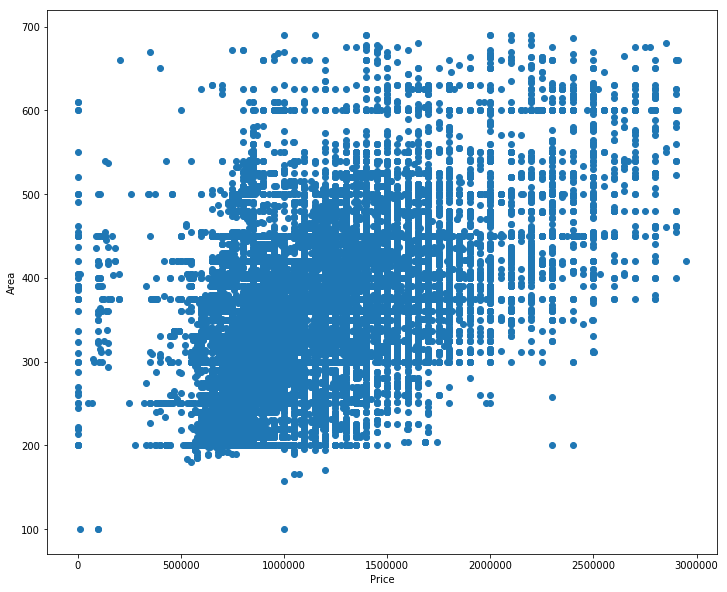

In [12]:
rcParams['figure.figsize'] = 12, 10
plt.scatter(df_no_out[['Price']].values, df_no_out[['Area m2']].values)
plt.xlabel('Price')
plt.ylabel('Area')
plt.show()

<b>Cost</b>
\begin{equation}
J(\theta) = 1/2m \sum_{i=1}^{m} (h_{(\theta)}^{(i)} - y^{(i)})^2 
\end{equation}

<b>Gradient</b>

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h_{(\theta)}^{(i)} - y^{(i)}).X_j^{(i)}
\end{equation}

<b>Gradients</b>
\begin{equation}
\theta_0: = \theta_0 -\alpha . (1/m .\sum_{i=1}^{m}(h_{(\theta)}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
\theta_1: = \theta_1 -\alpha . (1/m .\sum_{i=1}^{m}(h_{(\theta)}^{(i)} - y^{(i)}).X_1^{(i)})
\end{equation}
\begin{equation}
\theta_2: = \theta_2 -\alpha . (1/m .\sum_{i=1}^{m}(h_{(\theta)}^{(i)} - y^{(i)}).X_2^{(i)})
\end{equation}

\begin{equation}
\theta_j: = \theta_j -\alpha . (1/m .\sum_{i=1}^{m}(h_{(\theta)}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

<b>Gradient Descent</b>

Reapeat{

\begin{equation}
 \theta_j := \theta_j - \alpha^* \frac{\partial J(\theta)}{\partial \theta_j}
\end{equation}
}

<b>Stochastic Gradient Descent</b>

Reapeat{

\begin{equation}
 \theta_j := \theta_j - \alpha^* \frac{\partial J(\theta)}{\partial \theta_j}({X^{(i)}, y^{(i)}})
\end{equation}
}

<b>Minibatch Gradient Descent</b>

Reapeat{

\begin{equation}
 \theta_j := \theta_j - \alpha^* \frac{\partial J(\theta)}{\partial \theta_j}({X^{(i)}_{b}, y^{(i)}_{b}})
\end{equation}
}

In [0]:
#Multivariant Regression using Closed form
class Regression(object):
    def __init__(self):
        return
    
    def fit_predict(self, X, Y):
        self.X = X
        self.Y = Y
        #--either beta syntax below would work
        #beta = np.linalg.solve(np.dot(self.X.T, self.X), np.dot(self.X.T, self.Y))
        beta = np.linalg.inv(self.X.T.dot(self.X)).dot(self.X.T).dot(self.Y)
        Y_hat = self.X.dot(beta)
        return Y_hat
    
    #-Mean Square Error
    def RMSE(self, yh, y):
        return np.sqrt(np.square(yh - y).mean())
    #-Mean Square Error
    def MSE(self, yh, y):
        return np.square(yh - y).mean()
    #-Mean Absolute Error
    def MAE(self, yh, y):
        return np.abs(yh - y).mean()
    #-R-squared Error
    def R_squared(self, yh, y):
        #-- R_square = 1 - (SS[reg]/SS[total])
        # 1 - (y-yh).dot(y-yh)/(y - y.mean()).dot(y - y.mean()) OR
        return (1 -(np.sum(np.square(y - yh))/np.sum(np.square(y - y.mean()))))
        
    def summary(self, X, y, y_hat):
        #y_hat = self.fit_predict(self.X, self.Y)
        print('*'*40)
        print('\t\tSummary')
        print('*'*40)
        print('RMSE: %s'%(self.RMSE(y_hat,  Y)))
        print('*'*40)
        print('MSE: %s'%(self.MSE(y_hat,  Y)))
        print('*'*40)
        print('MAE: %s'%(self.MAE(y_hat,  Y)))
        print('*'*40)
        print('R_squared = %s'%(self.R_squared(y_hat,  Y)))
        print('*'*40)
    
    def plot(self, X, Y, y_hat):
        import matplotlib.pyplot as plt
        plt.plot(np.arange(X.shape[0]), Y)
        plt.plot(np.arange(X.shape[0]), y_hat)
        plt.title('True vlaue vs Predicted value')
        plt.xlabel('Data point')
        plt.ylabel('True vlaue vs Predicted value')
        
class GradientDescent(Regression):
    '''
    Inherits Regression class
    '''
    def __init__(self):
        super().__init__()
        return
    
    def cost(self, X, Y, beta):
        '''
        param: X = training examples/data. column vector <x1, x2, ...., xn | x E R^D>
        param: Y = target. vector  <y | y E R^DX1>
        param: beta = coefficients, e.g b0, b1
        Return: cost
        '''
        return (1/2*len(Y)) * np.sum(np.square(X.dot(beta) - Y))
    
    def GD(self, X, Y, beta, alpha, iterations, early_stopping = None):
        '''
        param: X = NxD feature matrix
        param: Y = Dx1 column vector
        param: beta = Dx1 beta vector coefficients
        param: alpha = learning rate. Default 1e-2
        param: iterations = Number of times to run. Default 1000
        
        Return type; final beta/coefficients, cost and bata iterations
        '''
        cost_rec = np.zeros(iterations)
        beta_rec = np.zeros((iterations, X.shape[1]))
        if early_stopping:
            for ii in range(iterations):
                #compute gradient
                beta = beta - (1/len(Y)) *(alpha) * (np.dot(X.T, (np.dot(X,beta) - Y)))
                beta_rec[ii, :] = beta.T
                cost_rec[ii] = self.cost(X, Y, beta)
                print('*'*40)
                print('%s iteratiion, cost = %s'%(ii, cost_rec[ii]))
                #--compare last and previous value. stop if they are the same
                if not cost_rec[ii] == cost_rec[ii -1]:
                    continue
                else:
                    break
            y_hat = X.dot(beta)
            return beta, cost_rec[:ii], beta_rec, y_hat, ii
        else:
            for ii in range(iterations):
                #compute gradient
                beta = beta - (1/len(Y)) *(alpha) * (np.dot(X.T, (np.dot(X,beta) - Y)))
                beta_rec[ii, :] = beta.T
                cost_rec[ii] = self.cost(X, Y, beta)
                print('*'*40)
                print('%s iteratiion, cost = %s'%(ii, cost_rec[ii]))
            print('*'*40)
            y_hat = X.dot(beta)
            return beta, cost_rec, beta_rec, y_hat, ii
        
    def plot_cost(self, cost, iter_):
        import matplotlib.pyplot as plt
        plt.plot(np.arange(iter_), cost)
        plt.title('Cost vs Number of iteration')
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.show()
        
class StochasticGradientDescent(Regression):
    '''
    Inherits Regression class
    '''
    def __init__(self):
        super().__init__()
        return
    
    def cost(self, X, Y, beta):
        '''
        param: X = training examples/data. column vector <x1, x2, ...., xn | x E R^D>
        param: Y = target. vector  <y | y E R^DX1>
        param: beta = coefficients, e.g b0, b1
        Return: cost
        '''
        return (1/2*len(Y)) * np.sum(np.square(X.dot(beta) - Y))
    
    def StochGD(self, X, Y, beta, alpha, iterations, early_stopping = None):
        '''
        param: X = NxD feature matrix
        param: Y = Dx1 column vector
        param: beta = Dx1 beta vector coefficients
        param: alpha = learning rate. Default 1e-2
        param: iterations = Number of times to run. Default 1000
        
        Return type; final beta/coefficients, cost and bata iterations
        '''
        cost_rec = np.zeros(iterations)
        len_y = len(Y)
        if early_stopping:
            for ii in range(iterations):
                #compute gradient
                cost_val = []
                for ij in range(len_y):
                    random_samples = np.random.randint(1, len_y)
                    X_samp = X[:random_samples]
                    Y_samp = Y[:random_samples]
                    beta = beta - (1/len(Y_samp)) *(alpha) * (np.dot(X_samp.T, (np.dot(X_samp,beta) - Y_samp)))
                    cost_val.append(self.cost(X_samp, Y_samp, beta))
                    if cost_val[ij] == cost_val[ij -1]:
                        break
                    else:
                        continue
                cost_rec[ii] = np.average(cost_val)
                print('*'*40)
                print('%s iteratiion, cost = %s'%(ii, cost_rec[ii]))    
                #--compare last and previous value. stop if they are the same
                if not cost_rec[ii] == cost_rec[ii -1]:
                    continue
                else:
                    break
            print('*'*40)
            y_hat = X.dot(beta)
            return beta, cost_rec[:ii], y_hat, ii
        else:
            for ii in range(iterations):
                #compute gradient
                cost_val = 0.0
                for ij in range(len_y):
                    random_samples = np.random.randint(1, len_y)
                    X_samp = X[:random_samples]
                    Y_samp = Y[:random_samples]
                    beta = beta - (1/len(Y_samp)) *(alpha) * (np.dot(X_samp.T, (np.dot(X_samp,beta) - Y_samp)))
                    cost_val += self.cost(X_samp, Y_samp, beta)
                cost_rec[ii] = cost_val
                print('*'*40)
                print('%s iteratiion, cost = %s'%(ii, cost_rec[ii]))    
            print('*'*40)
            y_hat = X.dot(beta)
            return beta, cost_rec, y_hat, ii
        
    def plot_cost(self, cost, iter_):
        import matplotlib.pyplot as plt
        plt.plot(np.arange(iter_), cost)
        plt.title('Cost vs Number of iteration')
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.show()
        
class MinibatchGradientDescent(Regression):
    '''
    Inherits Regression class
    '''
    def __init__(self):
        super().__init__()
        return
    
    def cost(self, X, Y, beta):
        '''
        param: X = training examples/data. column vector <x1, x2, ...., xn | x E R^D>
        param: Y = target. vector  <y | y E R^DX1>
        param: beta = coefficients, e.g b0, b1
        Return: cost
        '''
        return (1/2*len(Y)) * np.sum(np.square(X.dot(beta) - Y))
    
    def minbatchGD(self, X, Y, beta, alpha, iterations, batch_size = None, early_stopping = None):
        '''
        param: X = NxD feature matrix
        param: Y = Dx1 column vector
        param: beta = Dx1 beta vector coefficients
        param: alpha = learning rate. Default 1e-2
        param: iterations = Number of times to run. Default 1000
        
        Return type; final beta/coefficients, cost and bata iterations
        '''
        cost_rec = np.zeros(iterations)
        len_y = len(Y)
        number_batches = int(len_y/batch_size)
        if early_stopping:
            for ii in range(iterations):
                cost_val = 0
                #randomize dataset using permutation
                random_samples = np.random.permutation(len_y)
                X_random = X[random_samples]
                Y_random = Y[random_samples]
                for ij in range(0, len_y, number_batches):
                    #split into batches
                    X_samp = X_random[ij:ij+batch_size]
                    Y_samp = Y_random[ij:ij+batch_size]
                    beta = beta - (1/len(Y_samp)) *(alpha) * (np.dot(X_samp.T, (np.dot(X_samp,beta) - Y_samp)))
                    cost_val += self.cost(X_samp, Y_samp, beta)
#                    if cost_val[ij] == cost_val[ij -1]:
#                        break
#                    else:
#                        continue
                cost_rec[ii] = cost_val #np.average(cost_val)
                print('*'*40)
                print('%s iteratiion, cost = %s'%(ii, cost_rec[ii]))    
                #--compare last and previous value. stop if they are the same
                if not cost_rec[ii] == cost_rec[ii -1]:
                    continue
                else:
                    break
            print('*'*40)
            y_hat = X.dot(beta)
            return beta, cost_rec[:ii], y_hat, ii
        else:
            for ii in range(iterations):
                cost_val = 0
                #randomize dataset using permutation
                random_samples = np.random.permutation(len_y)
                X_random = X[random_samples]
                Y_random = Y[random_samples]
                for ij in range(0, len_y, number_batches):
                    #split into batches
                    X_samp = X_random[ij:ij+batch_size]
                    Y_samp = Y_random[ij:ij+batch_size]
                    beta = beta - (1/len(Y_samp)) *(alpha) * (np.dot(X_samp.T, (np.dot(X_samp,beta) - Y_samp)))
                    cost_val += self.cost(X_samp, Y_samp, beta)
                cost_rec[ii] = cost_val 
                print('*'*40)
                print('%s iteratiion, cost = %s'%(ii, cost_rec[ii]))    
            print('*'*40)
            y_hat = X.dot(beta)
            return beta, cost_rec, y_hat, ii
        
    def plot_cost(self, cost, iter_):
        import matplotlib.pyplot as plt
        plt.plot(np.arange(iter_), cost)
        plt.title('Cost vs Number of iteration')
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.show()

In [0]:
features = ['Area m2',
             'District_id',
             'Street Width',
             'Driver Room',
             'Extra Unit',
             'Apartments',
             'Bed Rooms',
             'WC',
             'With Stairs',
             'Living Rooms',
             'Servant Room']
X = df_standard_no_out[features]
X = np.c_[np.ones((X.shape[0], 1)), X]    
Y = df_standard_no_out[['Price']].values


In [0]:
lm = Regression()

In [17]:
yhat = lm.fit_predict(X, Y); yhat

array([[-0.63252894],
       [ 0.61207865],
       [-0.46636347],
       ...,
       [-1.2921926 ],
       [-0.59979472],
       [-0.42950184]])

In [18]:
lm.summary(X, Y, yhat)

****************************************
		Summary
****************************************
RMSE: 0.724715470285459
****************************************
MSE: 0.5252125128710741
****************************************
MAE: 0.5387420143781725
****************************************
R_squared = 0.4747874871289851
****************************************


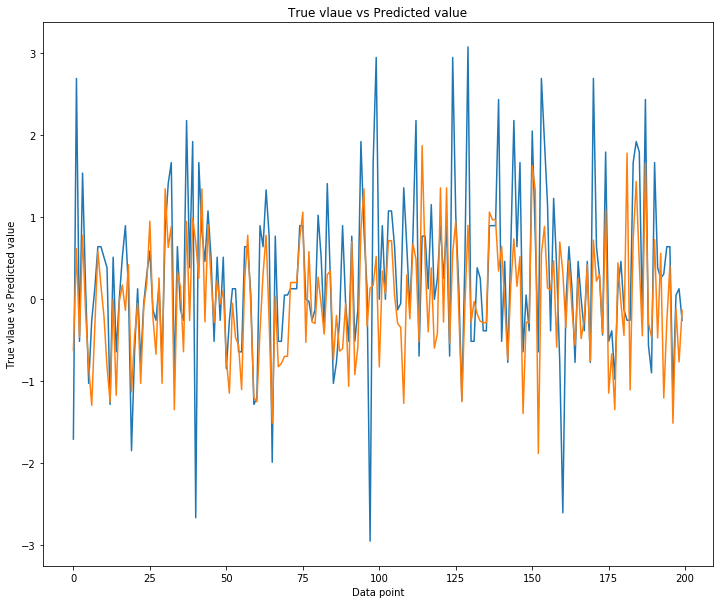

In [19]:
lm.plot(X[:200], Y[:200], yhat[:200])

In [20]:
iterations = 1000
gd = GradientDescent()
beta,cost_rec,theta_rec, yhat, stopping = gd.GD(X, Y, beta = np.zeros(X.shape[1]).reshape(-1, 1), alpha = 0.1, iterations = iterations, early_stopping=True)


****************************************
0 iteratiion, cost = 1260499161.2858553
****************************************
1 iteratiion, cost = 1130237280.9352043
****************************************
2 iteratiion, cost = 1039502327.0294856
****************************************
3 iteratiion, cost = 975281676.9829371
****************************************
4 iteratiion, cost = 929048321.9331532
****************************************
5 iteratiion, cost = 895170049.2332326
****************************************
6 iteratiion, cost = 869893771.6342561
****************************************
7 iteratiion, cost = 850694113.4825242
****************************************
8 iteratiion, cost = 835853539.6523783
****************************************
9 iteratiion, cost = 824190254.3394005
****************************************
10 iteratiion, cost = 814880815.0609685
****************************************
11 iteratiion, cost = 807343741.2936124
***********************************

In [21]:
gd.summary(X, Y, yhat)

****************************************
		Summary
****************************************
RMSE: 0.7247154702854597
****************************************
MSE: 0.5252125128710751
****************************************
MAE: 0.5387420128644292
****************************************
R_squared = 0.4747874871289842
****************************************


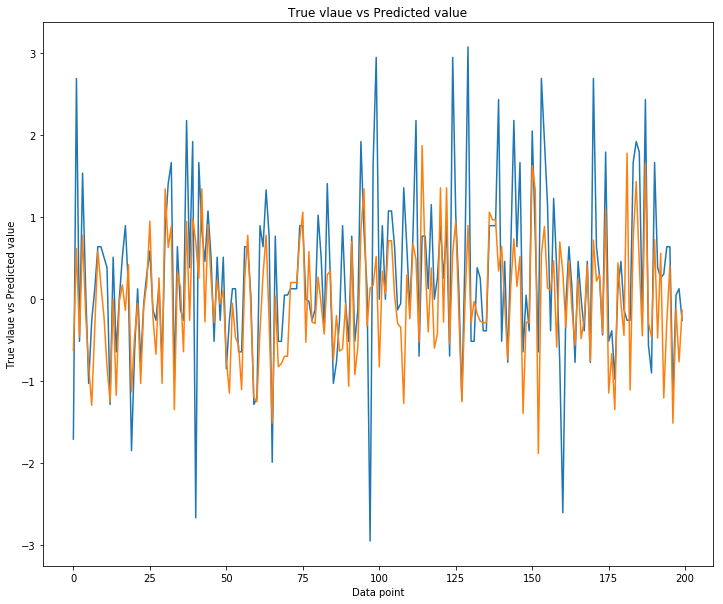

In [22]:
gd.plot(X[:200], Y[:200], yhat[:200])

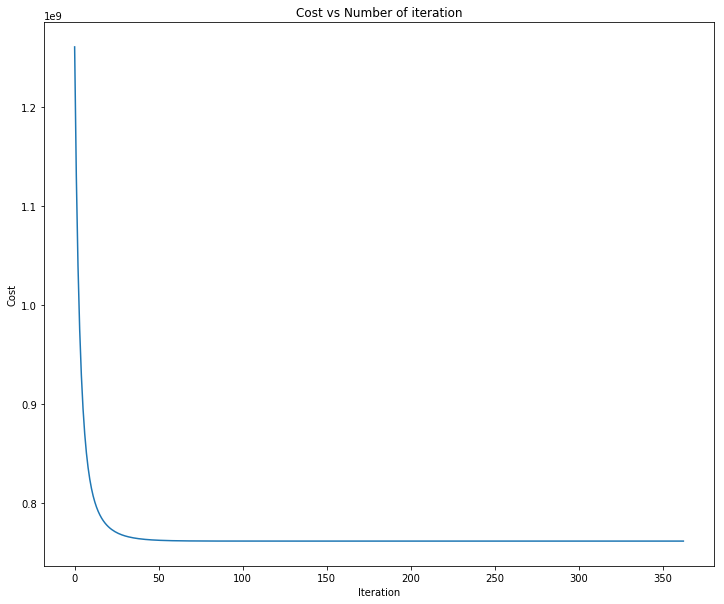

In [23]:
gd.plot_cost(cost_rec, stopping)

In [24]:
#--stochastic gradient descent
stgrad = StochasticGradientDescent()
beta,cost_rec, yhat, stopping = stgrad.StochGD(X, Y, beta = np.zeros(X.shape[1]).reshape(-1, 1), alpha = 0.8, iterations = iterations, early_stopping=True)

****************************************
0 iteratiion, cost = 437359599.9251905
****************************************
1 iteratiion, cost = 777764415.6071775
****************************************
2 iteratiion, cost = 624005410.4357113
****************************************
3 iteratiion, cost = 44898507.94791232
****************************************
4 iteratiion, cost = 70684475.88375342
****************************************
5 iteratiion, cost = 44925125.72185647
****************************************
6 iteratiion, cost = 319814606.9521493
****************************************
7 iteratiion, cost = 178689119.24521643
****************************************
8 iteratiion, cost = 209520049.8670873
****************************************
9 iteratiion, cost = 191368794.4720093
****************************************
10 iteratiion, cost = 71119023.51964553
****************************************
11 iteratiion, cost = 49928656.71471207
*************************************

In [25]:
stgrad.summary(X, Y, yhat)

****************************************
		Summary
****************************************
RMSE: 0.7269001556885849
****************************************
MSE: 0.5283838363400889
****************************************
MAE: 0.5424821928340388
****************************************
R_squared = 0.4716161636599707
****************************************


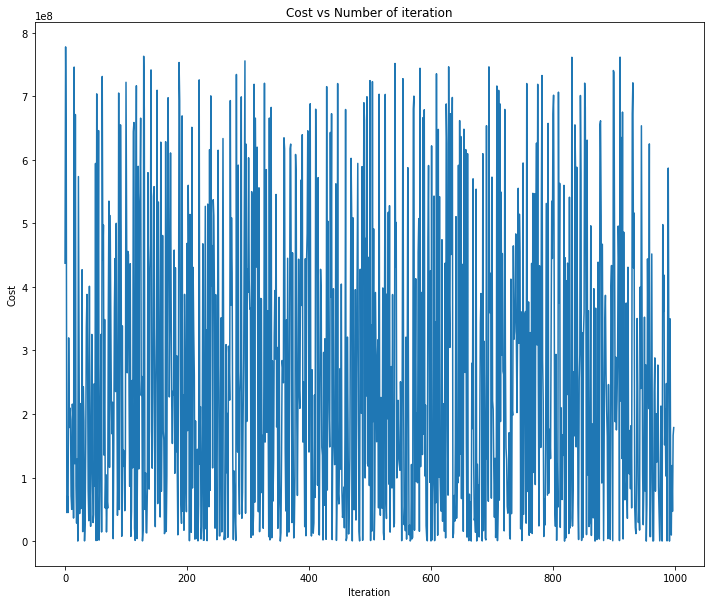

In [26]:
stgrad.plot_cost(cost_rec, stopping)

In [27]:
iterations = 1000
minibatch = MinibatchGradientDescent()
beta,cost_rec, yhat, stopping = minibatch.minbatchGD(X, Y, beta = np.zeros(X.shape[1]).reshape(-1, 1), alpha = 0.001, iterations = iterations, batch_size = 50, early_stopping=True)

****************************************
0 iteratiion, cost = 59581.77833928912
****************************************
1 iteratiion, cost = 61176.17786127474
****************************************
2 iteratiion, cost = 55784.070978667856
****************************************
3 iteratiion, cost = 48803.45942967026
****************************************
4 iteratiion, cost = 47993.12562828051
****************************************
5 iteratiion, cost = 46148.00647970289
****************************************
6 iteratiion, cost = 45072.35777304708
****************************************
7 iteratiion, cost = 42521.38954930101
****************************************
8 iteratiion, cost = 44820.749886131394
****************************************
9 iteratiion, cost = 39331.44018879984
****************************************
10 iteratiion, cost = 39294.93145741624
****************************************
11 iteratiion, cost = 41095.433704136376
***********************************

In [28]:
minibatch.summary(X, Y, yhat)

****************************************
		Summary
****************************************
RMSE: 0.7247633998089357
****************************************
MSE: 0.5252819857026071
****************************************
MAE: 0.5385770683852483
****************************************
R_squared = 0.4747180142974522
****************************************


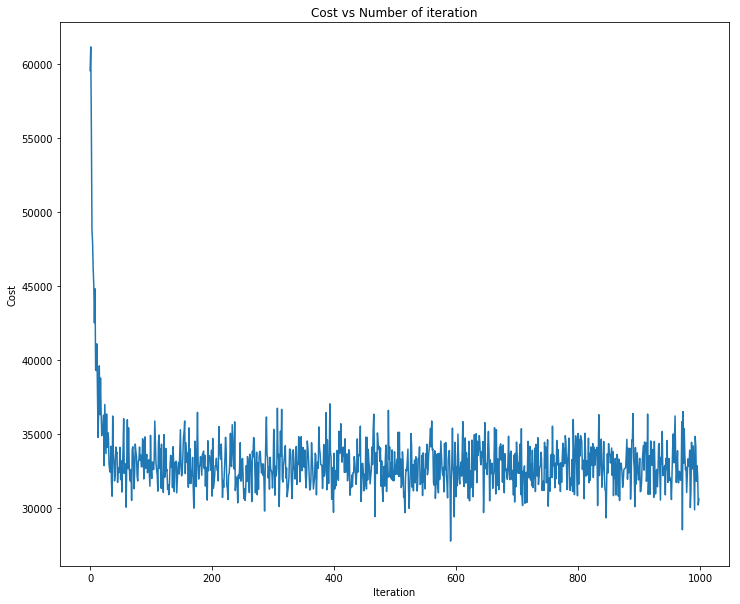

In [29]:
minibatch.plot_cost(cost_rec, stopping)